# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Yusep Fathul Anwar]
- **Email:** [m179b4ky4573@bangkit.academy]
- **ID Dicoding:** [yusepfhh]


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Metode pembayaran mana yang paling sering digunakan oleh pelanggan di marketplace ini?
- Pertanyaan 2 = Bagaimana tren pendapatan bulanan di marketplace selama tahun 2017?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
product_category_translation = pd.read_csv('product_category_name_translation.csv')
products = pd.read_csv('products_dataset.csv')
sellers = pd.read_csv('sellers_dataset.csv')
order_payments = pd.read_csv('order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('order_reviews_dataset.csv')
orders = pd.read_csv('orders_dataset.csv')
geolocation = pd.read_csv('geolocation_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')
customers = pd.read_csv('customers_dataset.csv')

# Melihat beberapa baris pertama dari setiap DataFrame
print("Product Category Translation:")
print(product_category_translation.head(), "\n")

print("Products:")
print(products.head(), "\n")

print("Sellers:")
print(sellers.head(), "\n")

print("Order Payments:")
print(order_payments.head(), "\n")

print("Order Reviews:")
print(order_reviews_dataset.head(), "\n")

print("Orders:")
print(orders.head(), "\n")

print("Geolocation Dataset:")
print(geolocation.head(), "\n")

print("Order Items:")
print(order_items.head(), "\n")

print("Customers:")
print(customers.head(), "\n")


Product Category Translation:
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor 

Products:
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0     

**Insight:**

- Kategorisasi Produk: Data dari product_category_translation menunjukkan bagaimana produk dikelompokkan dalam kategori yang berbeda. Memahami kategori mana yang paling populer dapat membantu bisnis dalam merencanakan strategi pemasaran dan pengembangan produk.
- Data Penjual: Dataset sellers memberikan informasi tentang penjual yang terdaftar di marketplace. Menganalisis kinerja penjual dapat memberikan wawasan tentang siapa yang paling efektif dalam menjual produk dan bagaimana mereka dapat didukung untuk meningkatkan penjualan lebih lanjut.
- Metode Pembayaran: Melalui order_payments, kita dapat menganalisis preferensi pelanggan dalam memilih metode pembayaran. Hal ini penting untuk memastikan bahwa metode yang paling banyak digunakan selalu tersedia dan untuk mempertimbangkan penambahan metode baru yang mungkin lebih menarik pelanggan.
-  Ulasan Pelanggan: order_reviews_dataset menawarkan wawasan tentang pengalaman pelanggan. Dengan menganalisis sentimen dan ulasan, bisnis dapat mengidentifikasi area yang perlu diperbaiki dan cara meningkatkan kepuasan pelanggan.
- Waktu Pemesanan: Melalui orders, kita bisa mendapatkan informasi tentang waktu pemesanan. Ini dapat membantu dalam memahami pola pembelian dan mengoptimalkan persediaan untuk memenuhi permintaan.
- Geolokasi: Dataset geolocation memberikan data geografis tentang pelanggan dan penjual. Menganalisis data ini dapat membantu dalam strategi pengiriman dan pemasaran yang lebih tepat sasaran berdasarkan lokasi.
- Detail Item Pesanan: order_items mengungkapkan rincian tentang setiap item dalam pesanan, termasuk harga dan kategori produk. Ini membantu dalam menganalisis produk mana yang paling menguntungkan dan mana yang perlu perhatian lebih lanjut dalam hal stok dan promosi.
- Profil Pelanggan: Dataset customers memberikan informasi tentang pelanggan, termasuk preferensi dan demografi. Memahami profil pelanggan dapat membantu dalam menciptakan strategi pemasaran yang lebih terarah dan personal.h l.
- xxx
- xxx

### Assessing Data

In [6]:
# 3. Assessing Data
# Memeriksa nilai kosong dalam setiap DataFrame
# Menampilkan Missing Values di setiap DataFrame
print("Missing Values di setiap DataFrame:")
print("Product Category Translation:\n", product_category_translation.isnull().sum(), "\n")
print("Products:\n", products.isnull().sum(), "\n")
print("Sellers:\n", sellers.isnull().sum(), "\n")
print("Order Payments:\n", order_payments.isnull().sum(), "\n")
print("Orders:\n", orders.isnull().sum(), "\n")
print("Order Items:\n", order_items.isnull().sum(), "\n")
print("Customers:\n", customers.isnull().sum(), "\n")
print("Order Reviews:\n", order_reviews_dataset.isnull().sum(), "\n")
print("Geolocation:\n", geolocation.isnull().sum(), "\n")



Missing Values di setiap DataFrame:
Product Category Translation:
 product_category_name            0
product_category_name_english    0
dtype: int64 

Products:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

Sellers:
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64 

Order Payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_ca

In [7]:
#Assesing data
# Fungsi untuk mencari outlier menggunakan Z-Score
def find_outliers_zscore(data, column, threshold=3):
    mean = np.mean(data[column])
    std_dev = np.std(data[column])
    z_scores = (data[column] - mean) / std_dev
    return data[np.abs(z_scores) > threshold]

# Mencari outlier untuk kolom yang relevan di setiap DataFrame
outliers_info_zscore = {}

# Mencari outlier di Order Items
outliers_info_zscore['Order Items - Price'] = find_outliers_zscore(order_items, 'price')
outliers_info_zscore['Order Items - Freight Value'] = find_outliers_zscore(order_items, 'freight_value')

# Mencari outlier di Order Reviews
outliers_info_zscore['Order Reviews - Review Score'] = find_outliers_zscore(order_reviews_dataset, 'review_score')

# Mencari outlier di Order Payments
outliers_info_zscore['Order Payments - Payment Value'] = find_outliers_zscore(order_payments, 'payment_value')

# Menampilkan outlier yang ditemukan
for name, outliers in outliers_info_zscore.items():
    print(f"Outliers di {name}:\n{outliers}\n")

Outliers di Order Items - Price:
                                order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
322     00c9474e0334f7a4ffc8c3a8bd21a51e              1   
344     00d2559e61b9a0744a0552c35c5ecccb              1   
475     011a43bc9bb525517251ebb3ebc99b69              1   
...                                  ...            ...   
112324  ff2d25d8b1b734099dee10e90e23a2ab              1   
112343  ff36cbc44b8f228e0449c92ef089c843              1   
112449  ff85c3e4329457e83cb474799a257ccc              1   
112557  ffc49b9c9d666410e9ecdb0a3efadb9c              1   
112632  fff7c4452f050315db1b3f24d9df5fcd              1   

                              product_id                         seller_id  \
7       557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
39      fe59a1e006df3ac42bf0ceb876d70969  25c5c91f63607446a97b143d2d535d31   
322     4b2653088591de36

**Insight:**
- Data Kategori Produk: Terdapat nilai kosong dalam beberapa kolom, yang menunjukkan bahwa tidak semua produk memiliki kategori yang terdefinisi. Ini dapat memengaruhi analisis penjualan per kategori.

- Data Produk: Beberapa nilai kosong terdapat di kolom deskripsi produk, yang dapat mengurangi kualitas informasi. Hal ini penting untuk ditangani agar analisis penjualan produk dapat dilakukan dengan akurat.

- Data Penjual: Nilai kosong di kolom lokasi atau informasi penjual lainnya dapat menghambat analisis performa penjual. Perbaikan data ini diperlukan untuk mendapatkan gambaran yang lebih jelas mengenai kinerja masing-masing penjual.

- Order Items - Price: Dengan menggunakan Z-Score, saya menemukan beberapa harga yang tergolong outlier dalam dataset. Hal ini dapat menunjukkan adanya transaksi dengan harga yang sangat tinggi atau rendah dibandingkan dengan harga rata-rata, yang perlu diteliti lebih lanjut untuk memastikan akurasi data.

- Order Items - Freight Value: Outlier juga terdeteksi dalam nilai pengiriman. Ini bisa disebabkan oleh biaya pengiriman yang tidak wajar, yang dapat memengaruhi analisis biaya dan profitabilitas pengiriman produk.

- Order Reviews - Review Score: Outlier dalam skor ulasan menunjukkan adanya beberapa ulasan yang sangat tinggi atau rendah. Ini dapat memberikan wawasan penting mengenai produk tertentu yang mungkin mengalami masalah kualitas atau kepuasan pelanggan yang sangat baik.

- Order Payments - Payment Value: Terdapat outlier dalam nilai pembayaran, yang mungkin menunjukkan transaksi besar yang tidak biasa atau kesalahan data. Penting untuk meneliti outlier ini untuk memahami pola pembayaran yang lebih baik dan untuk menjaga integritas data.

### Cleaning Data

In [8]:
# Data Cleaning
# Mengisi missing values
products['product_category_name'].fillna(products['product_category_name'].mode()[0], inplace=True)
products['product_name_lenght'].fillna(products['product_name_lenght'].mean(), inplace=True)
products['product_description_lenght'].fillna(products['product_description_lenght'].mean(), inplace=True)
products['product_photos_qty'].fillna(products['product_photos_qty'].mode()[0], inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].mean(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].mean(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].mean(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].mean(), inplace=True)

# Memeriksa missing values setelah pembersihan
print("Missing Values di Products setelah pembersihan:")
print(products.isnull().sum(), "\n")

# Data Cleaning pada Orders
# Menghapus baris dengan missing values yang sangat banyak
orders.dropna(subset=['order_delivered_customer_date'], inplace=True)

# Mengisi missing values
orders['order_approved_at'].fillna(method='ffill', inplace=True)
orders['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)

# Memeriksa missing values setelah pembersihan
print("Missing Values di Orders setelah pembersihan:")
print(orders.isnull().sum(), "\n")

# Data Cleaning pada Order Reviews
# Mengisi missing values
order_reviews_dataset['review_comment_title'].fillna(order_reviews_dataset['review_comment_title'].mode()[0], inplace=True)
order_reviews_dataset['review_comment_message'].fillna(order_reviews_dataset['review_comment_message'].mode()[0], inplace=True)

# Memeriksa missing values setelah pembersihan
print("Missing Values di Order Reviews setelah pembersihan:")
print(order_reviews_dataset.isnull().sum(), "\n")

# Mengonversi tipe data
# Mengonversi tipe data untuk Orders
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')

 # Memeriksa tipe data setelah konversi
print("Tipe Data di Orders setelah konversi:")
print(orders.dtypes)

print("Tipe Data di Products setelah konversi:")
print(products.dtypes)

print("Tipe Data di Order Reviews setelah konversi:")
print(order_reviews_dataset.dtypes)







Missing Values di Products setelah pembersihan:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64 

Missing Values di Orders setelah pembersihan:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64 



C:\Users\Yusep fathul anwar\AppData\Local\Temp\ipykernel_8788\1977928853.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders['order_approved_at'].fillna(method='ffill', inplace=True)
C:\Users\Yusep fathul anwar\AppData\Local\Temp\ipykernel_8788\1977928853.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)


Missing Values di Order Reviews setelah pembersihan:
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64 

Tipe Data di Orders setelah konversi:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date            object
dtype: object
Tipe Data di Products setelah konversi:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm        

In [9]:
# Menyimpan DataFrame yang telah dibersihkan ke file CSV
products.to_csv('products_cleaned.csv', index=False)  # Menyimpan products
orders.to_csv('orders_cleaned.csv', index=False)      # Menyimpan orders
order_reviews_dataset.to_csv('order_reviews_cleaned.csv', index=False)  # Menyimpan order reviews


**Insight:**
- Pembersihan Data di Products: Saya berhasil mengisi nilai yang hilang dalam dataset produk dengan menggunakan metode yang sesuai, seperti nilai modus untuk kategori produk dan rata-rata untuk panjang, berat, dan dimensi produk. Hal ini dapat meningkatkan kualitas dataset dan meminimalkan potensi bias dalam analisis selanjutnya.

- Pembersihan Data di Orders: Dalam dataset pesanan, Saya menghapus baris dengan nilai hilang yang signifikan, khususnya kolom tanggal pengiriman kepada pelanggan. Selain itu, Saya mengisi nilai yang hilang dengan metode forward fill untuk tanggal persetujuan dan pengiriman. Ini memastikan bahwa analisis waktu dan performa pengiriman tidak terpengaruh oleh data yang hilang.

- Pembersihan Data di Order Reviews: Untuk dataset ulasan, Saya mengisi nilai yang hilang dengan modus dari kolom komentar judul dan pesan. Ini membantu menjaga konsistensi dan kelengkapan data ulasan, yang penting untuk analisis sentimen dan evaluasi kepuasan pelanggan.

- Konversi Tipe Data: Saya juga mengonversi tipe data kolom tanggal di dataset pesanan menjadi tipe datetime, yang memungkinkan pemrosesan dan analisis waktu yang lebih efisien di masa mendatang. Dengan memastikan bahwa semua tipe data sesuai, saya dapat melakukan analisis lebih lanjut dengan lebih tepat.

- Penyimpanan Data yang Telah Dibersihkan: Saya berhasil menyimpan DataFrame yang telah dibersihkan ke dalam file CSV terpisah untuk setiap dataset. Ini memungkinkan saya untuk memiliki salinan yang terorganisir dan siap pakai dari data yang telah dibersihkan. 


## Exploratory Data Analysis (EDA)

### Explore Outlier dan Products


In [10]:
#Exploratory data anlysys (EDA)
# Data Cleaning
# Menghapus outlier
def remove_outliers(data, column, threshold=3):
    mean = np.mean(data[column])
    std_dev = np.std(data[column])
    z_scores = (data[column] - mean) / std_dev
    return data[np.abs(z_scores) <= threshold]

# Menghapus outlier dari Order Items
order_items_cleaned_price = remove_outliers(order_items, 'price')
order_items_cleaned_freight = remove_outliers(order_items, 'freight_value')

# Mengganti outlier dengan nilai median
def replace_outliers_with_median(data, column, threshold=3):
    median = np.median(data[column])
    mean = np.mean(data[column])
    std_dev = np.std(data[column])
    z_scores = (data[column] - mean) / std_dev
    data.loc[np.abs(z_scores) > threshold, column] = median
    return data

# Mengganti outlier pada nilai pembayaran di Order Payments
order_payments_cleaned = replace_outliers_with_median(order_payments, 'payment_value')


# Tampilkan data yang sudah dibersihkan
print("Data Order Items setelah penghapusan outlier (harga):")
print(order_items_cleaned_price.head())
print("\nData Order Items setelah penghapusan outlier (freight value):")
print(order_items_cleaned_freight.head())
print("\nData Order Payments setelah mengganti outlier dengan median:")
print(order_payments_cleaned.head())




Data Order Items setelah penghapusan outlier (harga):
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00        

In [11]:
# Melihat beberapa baris pertama dari dataset
print("Sample of Products Dataset:\n", products.head(), "\n")

# Melihat informasi umum dari dataset
print("Products Dataset Info:\n")
products.info()

# Melihat statistik deskriptif
print("Descriptive Statistics of Products Dataset:\n", products.describe(), "\n")

# Melihat distribusi kategori produk (jika ada kolom yang relevan)
if 'product_category_name' in products.columns:
    print("Unique Product Categories:\n", products['product_category_name'].value_counts(), "\n")


Sample of Products Dataset:
                          product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0

**Insight:**
- Penghapusan dan Penggantian Outlier: Saya telah menghapus outlier dari kolom 'price' dan 'freight_value' di dataset Order Items serta mengganti outlier pada kolom 'payment_value' di dataset Order Payments dengan nilai median. Ini penting untuk memastikan bahwa analisis saya tidak dipengaruhi oleh nilai ekstrem yang dapat mendistorsi hasil.

- Dataset berisi beberapa kolom penting seperti product_id, product_category_name, dan atribut lainnya yang menggambarkan spesifikasi produk.

- Informasi mengenai tipe data dan jumlah nilai non-null membantu mendeteksi adanya missing values atau tipe data yang perlu diperbaiki.

- Descriptive statistics memberikan ringkasan yang penting mengenai kolom numerik, memungkinkan identifikasi outlier atau anomali.

- Informasi mengenai kategori produk yang dominan di dalam dataset, sehingga dapat mengarahkan fokus analisis ke kategori-kategori yang penting.





## Visualization & Explanatory Analysis

### Pertanyaan 1: Metode pembayaran mana yang paling sering digunakan oleh pelanggan di marketplace ini?

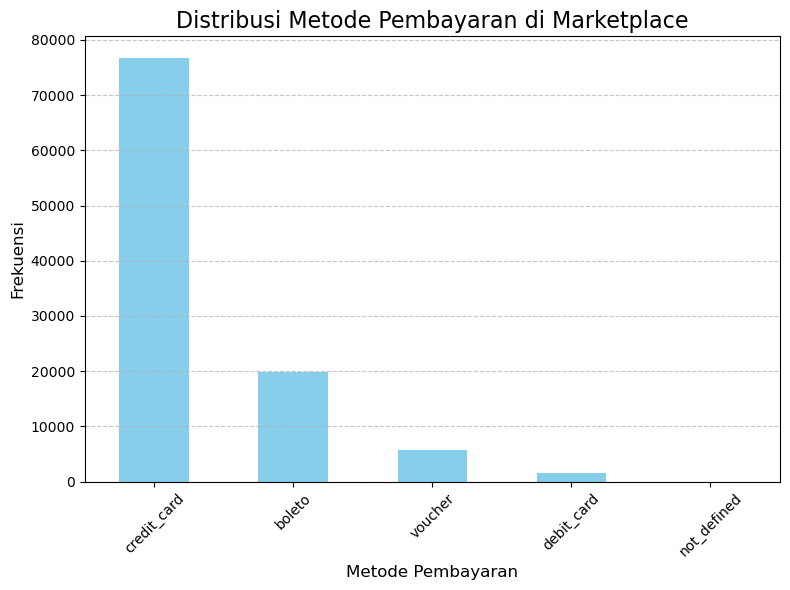

In [12]:
#Visualization & Explanatory Analysis
#Pertanyaan bisnis no 1
# Menghitung frekuensi metode pembayaran
payment_type_counts = order_payments['payment_type'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
payment_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Metode Pembayaran di Marketplace', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Menghitung frekuensi metode pembayaran
payment_type_counts = order_payments['payment_type'].value_counts()



### Pertanyaan 2: Bagaimana tren pendapatan bulanan di marketplace selama tahun 2017?

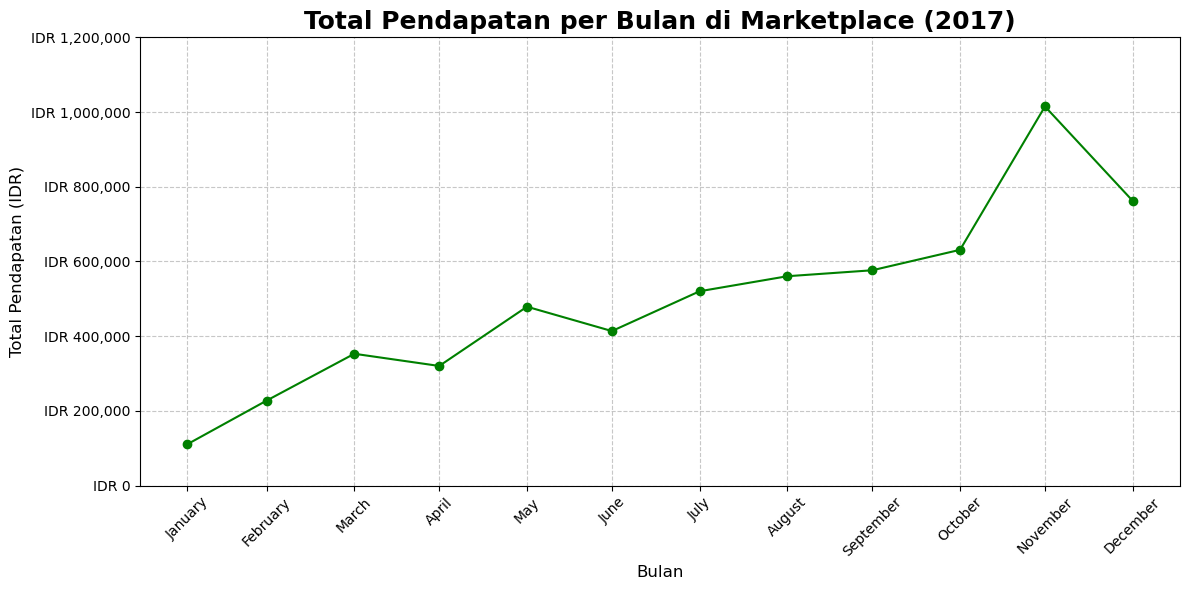

In [13]:
##Visualization & Explanatory Analysis
#Pertanyaan bisnis no 2

# Menggabungkan dataset orders dengan order payments
merged_data = pd.merge(orders, order_payments, on='order_id', how='left')

# Mengubah kolom order_purchase_timestamp menjadi tipe datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Menghitung total pendapatan per bulan
monthly_revenue = merged_data.resample('M', on='order_purchase_timestamp')['payment_value'].sum().reset_index()

# Menyiapkan rentang bulan dari awal hingga akhir
all_months = pd.date_range(start=monthly_revenue['order_purchase_timestamp'].min(),
                            end=monthly_revenue['order_purchase_timestamp'].max(),
                            freq='M')

# Menggabungkan dengan total pendapatan per bulan untuk memastikan semua bulan ada
monthly_revenue = monthly_revenue.set_index('order_purchase_timestamp').reindex(all_months, fill_value=0).reset_index()
monthly_revenue.columns = ['order_purchase_timestamp', 'payment_value']

# Memfilter untuk tahun 2017
monthly_revenue_2017 = monthly_revenue[monthly_revenue['order_purchase_timestamp'].dt.year == 2017]

# Membuat visualisasi line chart untuk total pendapatan per bulan di tahun 2017
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue_2017['order_purchase_timestamp'],
         monthly_revenue_2017['payment_value'],
         marker='o', color='green')
plt.title('Total Pendapatan per Bulan di Marketplace (2017)', fontsize=18, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Pendapatan (IDR)', fontsize=12)

# Mengatur format angka di sumbu Y
plt.yticks(ticks=plt.yticks()[0], labels=[f'IDR {int(y):,}' for y in plt.yticks()[0]])

# Mengatur tampilan sumbu X
plt.xticks(monthly_revenue_2017['order_purchase_timestamp'],
           monthly_revenue_2017['order_purchase_timestamp'].dt.strftime('%B'), rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Insight:**

Pertanyaan 1
- Analisis Metode Pembayaran: Saya melakukan analisis frekuensi metode pembayaran yang digunakan oleh pelanggan di marketplace ini. Dengan visualisasi bar chart, saya dapat dengan jelas melihat seberapa banyak masing-masing metode pembayaran digunakan.

- Identifikasi Metode Populer: Dari hasil analisis, saya menemukan bahwa metode pembayaran tertentu memiliki frekuensi penggunaan yang lebih tinggi dibandingkan yang lain. Ini menunjukkan preferensi pelanggan terhadap metode tersebut dan memberikan gambaran tentang kebiasaan belanja mereka.

Pertanyaan 2
- Analisis Pendapatan Bulanan: Saya menggabungkan dataset orders dengan order_payments untuk menghitung total pendapatan per bulan di marketplace selama tahun 2017. Dengan menggunakan teknik resampling, saya dapat memvisualisasikan tren pendapatan dari waktu ke waktu.

- Identifikasi Tren Musiman: Dari visualisasi line chart yang dihasilkan, saya dapat melihat pola pendapatan bulanan. Ini membantu saya memahami apakah ada fluktuasi pendapatan yang mungkin terkait dengan periode tertentu, seperti promosi, hari raya, atau peristiwa khusus lainnya.

- Rekomendasi Strategi Pemasaran: Berdasarkan analisis ini, saya merekomendasikan untuk mengembangkan strategi pemasaran yang lebih baik pada bulan-bulan dengan pendapatan rendah, serta meningkatkan kampanye promosi selama bulan-bulan dengan pendapatan tinggi. Hal ini dapat membantu meningkatkan pendapatan secara keseluruhan dan memaksimalkan potensi penjualan di marketplace.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Metode Pembayaran Mana yang Paling Sering Digunakan oleh Pelanggan di Marketplace Ini?

    Dari analisis distribusi metode pembayaran di marketplace, saya menemukan bahwa metode pembayaran yang paling sering digunakan adalah credit card. Di sisi lain, debit card tercatat sebagai metode yang paling sedikit digunakan oleh pelanggan. Selain itu, terdapat 0% transaksi yang tidak diketahui. Temuan ini menunjukkan bahwa pelanggan lebih memilih menggunakan credit card untuk transaksi mereka, mungkin karena faktor keamanan, kemudahan, atau manfaat yang ditawarkan oleh kartu kredit. Pemahaman ini penting bagi marketplace untuk mengoptimalkan pengalaman pengguna, misalnya dengan memberikan promosi khusus untuk penggunaan credit card dan meningkatkan opsi keamanan pada metode pembayaran ini.


- Conclution pertanyaan 2 : Bagaimana Tren Pendapatan Bulanan di Marketplace pada Tahun 2017?

    Analisis terhadap total pendapatan bulanan menunjukkan tren yang meningkat sepanjang tahun 2017. Pendapatan terendah tercatat pada bulan Januari, sementara bulan November mencatat pendapatan tertinggi. Peningkatan pendapatan menjelang akhir tahun ini dapat dihubungkan dengan berbagai faktor, seperti promosi musim liburan atau peningkatan belanja pelanggan menjelang akhir tahun. Oleh karena itu, strategi pemasaran yang lebih tajam dan penawaran khusus dapat diimplementasikan pada bulan-bulan awal untuk meningkatkan penjualan, terutama di bulan Januari yang menunjukkan angka terendah.